## Import Packages

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

In [0]:
import numpy as np
import pandas as pd
from datetime import date , timedelta

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.collections

import geopandas as gpd
import geoplot
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import Polygon

## Link to download Canada Map
https://www.geoboundaries.org/data/1_3_3/zip/shapefile/CAN/

## Canada Part

In [0]:

mydateparser = lambda x: pd.datetime.strptime(x, "%d-%m-%Y")
df = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19.csv', encoding = "iso-8859-1", parse_dates = ['date'] ,date_parser = mydateparser)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [0]:
#clean data
#load data of the provinces
maxDate = df['date'].max()
df_last = df[(df['date'] == maxDate)&(df['pruid'] > 1)&(df['pruid'] < 99)][['prname' ,'numconf','numdeaths']]
df_last.columns = ['Name' , 'numconf','numdeaths']
df_last = df_last.set_index('Name')
df_last

,numconf,numdeaths
Name,,
British Columbia,1291,43
Alberta,1373,26
Saskatchewan,260,3
Manitoba,203,3
Ontario,5276,174
Quebec,9340,150
Newfoundland and Labrador,228,2
New Brunswick,105,0
Nova Scotia,310,0


In [0]:
#LOAD CANADA map
can = gpd.GeoDataFrame.from_file('/Canada_map/CAN_ADM1.shp/CAN_ADM1.shp')

# join two data set ( geometric and the orginal dataset base on the Name of provinces)
can = can.set_index('Name').join(df_last)

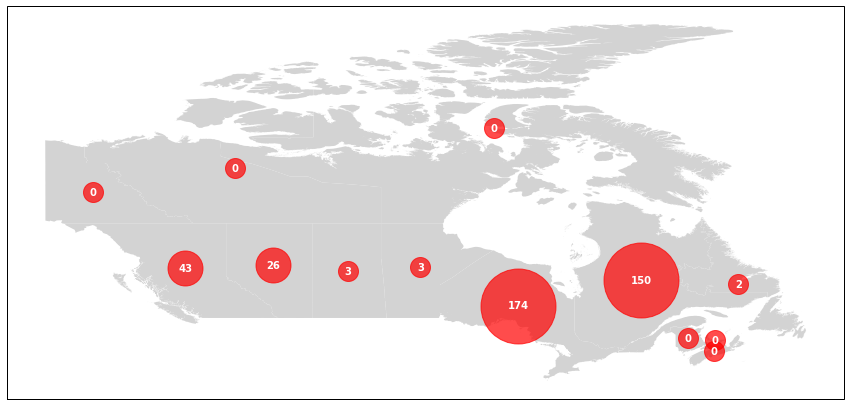

In [0]:
def set_size(num):

    size = 20
    if num >= 150 :
        size = 75
    elif 50 < num < 150:
        size = 50
    elif 10 < num <= 50:
        size = 35
    return size

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

can.plot(ax=ax, facecolor='lightgrey')
#can.centroid.plot(ax=ax, color='red')
for (idx, province), cd in zip(can.iterrows(), can.centroid):
    num = province['numdeaths']
    size = set_size(num)
    ax.text(cd.xy[0][0], cd.xy[1][0], str(num), ha='center', va='center', color = 'white', fontweight='bold')
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o', 
             color='red', 
             markersize= size, 
             transform=ccrs.Geodetic(),
             alpha=0.7,
            )

plt.show()
 


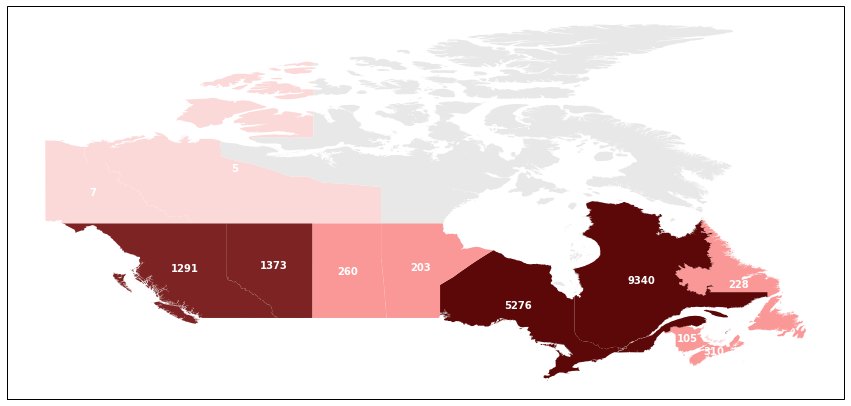

In [0]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
colors = ['#3d0909', '#571313', '#4f1010', '#9c3535', '#cc6666', '#6e1d1d', '#872929','#330606', '#1a0101', '#c77575', '#b54c4c', '#2e0505', '#e39f9f']
can.plot(ax=ax, facecolor='lightgrey' , color = colors)

for (idx, province), cd in zip(can.iterrows(), can.centroid):
    num = province['numconf']
    size = set_size(num)
    ax.text(cd.xy[0][0], cd.xy[1][0], str(num), ha='center', va='center', color = 'white' , fontweight='bold')
plt.show()

## World Part

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(geoplot.datasets.get_path('nyc_injurious_collisions'))

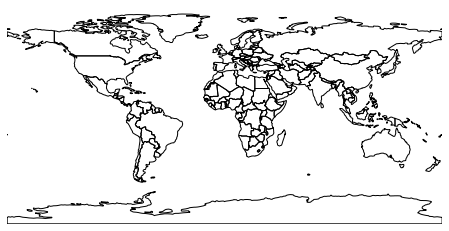

In [0]:
geoplot.polyplot(world, figsize=(8, 4));

/usr/local/lib/python3.6/dist-packages/descartes/patch.py:87: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return PathPatch(PolygonPath(polygon), **kwargs)


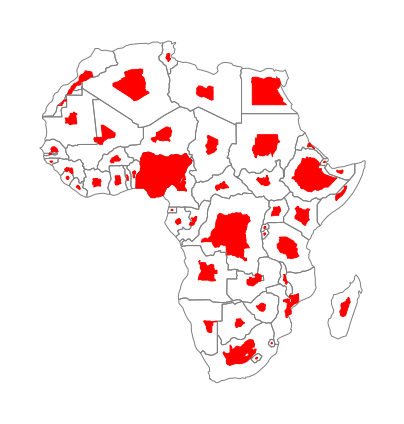

In [0]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram (
    africa, scale='pop_est', limits=(0.2, 1), color='red',
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)